In [1]:
import pickle
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
latest_pkl = '../mitigation/weblog_stats/allc7_stats.20220930.pkl'
print('Loading latest pickle: '+latest_pkl)
results=pickle.load(
        open(
            latest_pkl,
            'rb'
            )
        )
rpd = pd.DataFrame(results).transpose()
print('Results stored in pandas DataFrame name "rpd"')


Loading latest pickle: ../mitigation/weblog_stats/allc7_stats.20220930.pkl
Results stored in pandas DataFrame name "rpd"


In [3]:
pd.set_option('display.max_rows',1000)

In [4]:
rpd.columns

Index(['project', 'plversion', 'procedure', 'nant', 'totaltime', 'imgtime',
       'cubetime', 'aggtime', 'fctime', 'nEB', 'npt', 'nscan', 'reptgt',
       'nscience', 'nspw', 'webpredrms', 'webcontrms', 'webcontBW', 'webfreq',
       'webbm', 'webdirtyDR', 'webDRcorr', 'webcontpk', 'webfreqline',
       'webbmline', 'webpredrmsline', 'webdirtyDRline', 'webDRcorrline',
       'weblinerms', 'weblinepk', 'weblineBW', 'allowedcubesize',
       'allowedcubelimit', 'predcubesize', 'mitigatedcubesize',
       'allowedprodsize', 'initialprodsize', 'prodsizeaftercube',
       'mitigatedprodsize', 'mitigated', 'mit_nbins', 'mit_hm_imsize',
       'mit_hm_cell', 'mit_field', 'mit_spw'],
      dtype='object')

In [5]:
len(rpd)

2565

(array([ 762.,  131.,    0.,    0.,    0.,    2.,   42.,  373., 1122.,
         133.]),
 array([ 6. , 10.6, 15.2, 19.8, 24.4, 29. , 33.6, 38.2, 42.8, 47.4, 52. ]),
 <BarContainer object of 10 artists>)

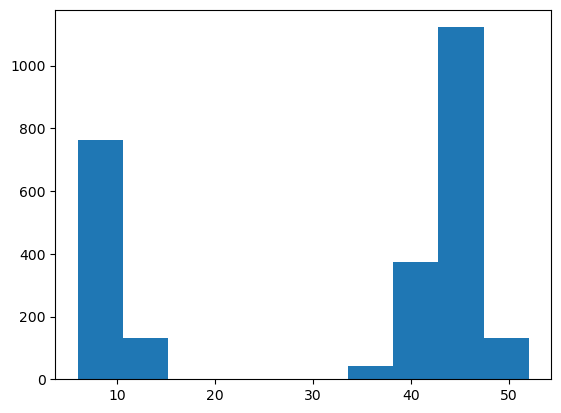

In [6]:
plt.hist(rpd['nant'])

In [7]:
# number of 12m mouses
len(rpd[rpd['nant'] > 18])

1672

In [8]:
# number of 7m mouses
len(rpd[rpd['nant'] <=18])

893

In [9]:
# total number of mouses
1672+893

2565

Matches the total length of the array

In [10]:
# total number of mitigated projects
len(rpd[(rpd['mitigated'] == True) ] )

397

In [11]:
idx_mit = (rpd['mitigated'] == True) & ((rpd['mit_spw'] != 'default') | (rpd['mit_field'] != 'default') | (rpd['mit_hm_cell'] != 'default') | (rpd['mit_hm_imsize'] != 'default') | (rpd['mit_nbins'] != 'default'))

In [12]:
len(rpd[idx_mit])

325

In [13]:
# total number of 12m mitigated projects
len(rpd[idx_mit][rpd[idx_mit]['nant'] > 18])

325

In [14]:
# total number of 7m mitigated mouses
len(rpd[idx_mit][rpd[idx_mit]['nant'] < 18])

0

In [18]:
# what are the proeprties of the 7m mouses
idx = (rpd['mitigated'] == True) &  (rpd['nant'] < 18)
rpd[idx][['mit_spw','mit_field','mit_hm_cell','mit_hm_imsize','mit_nbins']]

,mit_spw,mit_field,mit_hm_cell,mit_hm_imsize,mit_nbins
uid___A001_X1465_X2774,default,default,default,default,default
uid___A001_X1465_X3720,default,default,default,default,default
uid___A001_X1465_X6da,default,default,default,default,default
uid___A001_X1465_Xb,default,default,default,default,default
uid___A001_X1465_Xf00,default,default,default,default,default
uid___A001_X1467_X1e0,default,default,default,default,default
uid___A001_X1467_X1e7,default,default,default,default,default
uid___A001_X1467_X1ee,default,default,default,default,default
uid___A001_X1467_X1fc,default,default,default,default,default
uid___A001_X1467_X226,default,default,default,default,default


Looking at the above, they just trigger a warning for too much time time, but doesn't actually mitigate anything. So I'm going to remove those 25 projects from the total number of mitigated projects

In [19]:
# look at how many mous trigger product size mitigation only 
idx = (rpd['mitigated'] == True) & (rpd['predcubesize'] == rpd['mitigatedcubesize']) & (rpd['initialprodsize'] > rpd['mitigatedprodsize']) & (rpd['nant'] > 18)
print(len(rpd[idx]))
rpd[idx][['predcubesize','mitigatedcubesize','initialprodsize','prodsizeaftercube','mitigatedprodsize','mit_field','mit_spw','mit_nbins','mit_hm_imsize','mit_hm_cell']]

73


,predcubesize,mitigatedcubesize,initialprodsize,prodsizeaftercube,mitigatedprodsize,mit_field,mit_spw,mit_nbins,mit_hm_imsize,mit_hm_cell
uid___A001_X1465_X11a8,32.7,32.7,261.0,65.4,65.4,default,25,default,default,default
uid___A001_X1465_X120b,38.9,38.9,311.0,77.8,77.8,default,25,default,default,default
uid___A001_X1465_X122e,39.2,39.2,316.0,79.0,79.0,default,17,default,default,default
uid___A001_X1465_X143,2.15,2.15,571.0,346.0,346.0,"Oph_06,Oph_26,Oph_19,Oph_31,Oph_18,Oph_28,Oph_...",default,default,default,default
uid___A001_X1465_X1434,34.4,34.4,277.0,69.3,69.3,default,9,default,default,default
uid___A001_X1465_X143c,39.8,39.8,321.0,80.3,80.3,default,9,default,default,default
uid___A001_X1465_X144c,34.4,34.4,277.0,69.3,69.3,default,9,default,default,default
uid___A001_X1465_X1454,39.8,39.8,321.0,80.3,80.3,default,9,default,default,default
uid___A001_X1465_X145c,39.8,39.8,321.0,80.3,80.3,default,9,default,default,default
uid___A001_X1465_X1460,34.4,34.4,277.0,69.3,69.3,default,9,default,default,default


In [20]:
# cubes mitigated, but have all fields and spws
idx = (rpd['mitigated'] == True) & (rpd['predcubesize'] > rpd['mitigatedcubesize']) & (rpd['mit_field'] =='default') & (rpd['mit_spw'] == 'default') & (rpd['nant'] > 18)
print(len(rpd[idx]))
rpd[idx][['predcubesize','mitigatedcubesize','initialprodsize','prodsizeaftercube','mitigatedprodsize','mit_field','mit_spw','mit_nbins','mit_hm_imsize','mit_hm_cell']]

77


,predcubesize,mitigatedcubesize,initialprodsize,prodsizeaftercube,mitigatedprodsize,mit_field,mit_spw,mit_nbins,mit_hm_imsize,mit_hm_cell
uid___A001_X1465_X14f9,448.0,17.3,1850.0,73.8,73.8,default,default,"19:1,25:2,27:2,23:1",0.7pb,3ppb
uid___A001_X1465_X159c,65.3,37.3,236.0,135.0,135.0,default,default,default,0.4pb,default
uid___A001_X1465_X15a2,40.8,36.7,147.0,133.0,133.0,default,default,default,0.23pb,default
uid___A001_X1465_X16fa,43.4,21.7,179.0,92.6,92.6,default,default,"25:2,21:1,27:2,19:1",default,default
uid___A001_X1465_X1abe,700.0,28.3,4900.0,227.0,227.0,default,default,"25:2,37:2,27:1,33:1,29:1,35:2,31:1",0.7pb,3ppb
uid___A001_X1465_X1ac6,645.0,23.5,4520.0,188.0,188.0,default,default,"29:1,27:1,37:2,33:1,25:2,35:2,31:1",0.7pb,3ppb
uid___A001_X1465_X1ace,482.0,20.2,3370.0,161.0,161.0,default,default,"25:2,29:1,35:2,37:2,33:1,27:1,31:1",0.7pb,3ppb
uid___A001_X1465_X1ad2,2320.0,99.5,18600.0,797.0,797.0,default,default,"23:2,25:2,21:2,27:2",0.7pb,3ppb
uid___A001_X1465_X1ad6,723.0,28.3,5060.0,227.0,227.0,default,default,"33:1,29:1,37:2,25:2,35:2,31:1,27:1",0.7pb,3ppb
uid___A001_X1465_X1b10,700.0,24.9,3500.0,199.0,199.0,default,default,"27:2,23:1,25:1,29:1",0.7pb,3ppb


In [21]:
# cubes mitigated and number of spws and number of fields
idx = (rpd['mitigated'] == True) & (rpd['predcubesize'] > rpd['mitigatedcubesize']) & (rpd['mit_field'] !='default') & (rpd['mit_spw'] != 'default') & (rpd['nant'] > 18)
print(len(rpd[idx]))
rpd[idx][['predcubesize','mitigatedcubesize','initialprodsize','prodsizeaftercube','mitigatedprodsize','mit_field','mit_spw','mit_nbins','mit_hm_imsize','mit_hm_cell']]

13


,predcubesize,mitigatedcubesize,initialprodsize,prodsizeaftercube,mitigatedprodsize,mit_field,mit_spw,mit_nbins,mit_hm_imsize,mit_hm_cell
uid___A001_X1465_X2047,492.0,38.9,15700.0,234.0,234.0,Cl_star_NGC6618_B268,"25,27,29,31,35,37",default,0.7pb,3ppb
uid___A001_X1465_X2f66,53.8,38.5,861.0,154.0,154.0,HOPS_56,"25,29,31",default,0.32pb,default
uid___A001_X1465_X2f6b,69.1,38.9,1660.0,156.0,156.0,HOPS_140,"25,29,31",default,0.42pb,default
uid___A001_X1465_X2ff4,35.8,31.2,10600.0,125.0,125.0,serps11,"25,27,31",default,default,default
uid___A001_X1467_X1dc,34.6,31.9,16600.0,63.7,63.7,"""126991""",25,default,default,default
uid___A001_X1467_X1ea,31.9,30.1,14300.0,60.2,60.2,"""776981""",25,default,default,default
uid___A001_X1467_X1ff,34.6,31.9,830.0,63.7,63.7,"""519029""",25,default,default,default
uid___A001_X1467_X206,31.9,30.1,2040.0,60.2,60.2,"""545969""",25,default,default,default
uid___A001_X1467_X20d,62.4,31.2,999.0,62.5,62.5,"""561782""",25,"31:2,25:2,27:2,29:2",default,default
uid___A001_X146c_X259,354.0,38.9,5660.0,156.0,156.0,IRAS04166+2706,"25,27,29,31,37","29:2,37:2,27:2,35:2,31:2,25:2,33:2",0.7pb,default


In [22]:
# cube mitigated and number of fields, but not spws
idx = (rpd['mitigated'] == True) & (rpd['predcubesize'] > rpd['mitigatedcubesize']) & (rpd['mit_field'] !='default') & (rpd['mit_spw'] == 'default') & (rpd['nant'] > 18)
print(len(rpd[idx]))
rpd[idx][['predcubesize','mitigatedcubesize','initialprodsize','prodsizeaftercube','mitigatedprodsize','mit_field','mit_spw','mit_nbins','mit_hm_imsize','mit_hm_cell']]

12


,predcubesize,mitigatedcubesize,initialprodsize,prodsizeaftercube,mitigatedprodsize,mit_field,mit_spw,mit_nbins,mit_hm_imsize,mit_hm_cell
uid___A001_X1465_X3596,43.4,21.7,2430.0,347.0,347.0,"""G10.34-0.14"",""G11.92-0.61""",default,"29:2,27:2,25:2,31:2",default,default
uid___A001_X1465_X359d,8.64,7.96,277.0,127.0,127.0,"""G35.03+0.35"",""G34.30+0.20""",default,default,default,default
uid___A001_X1465_X3662,12.6,11.1,3030.0,425.0,425.0,"J18302857-0211253,J18303080-0214214,J18303111-...",default,default,default,default
uid___A001_X1467_X1e3,30.1,27.7,27200.0,222.0,222.0,"""100132""",default,default,default,default
uid___A001_X1467_X1e5,3.08,2.71,2790.0,304.0,304.0,"""100132"",""123833"",""118234"",""115972"",""109588"",""...",default,default,default,default
uid___A001_X1467_X1f1,30.1,27.7,4820.0,222.0,222.0,"""859783""",default,default,default,default
uid___A001_X1467_X1f8,31.9,27.7,9180.0,222.0,222.0,"""818184""",default,default,default,default
uid___A001_X1467_X21b,49.3,24.7,2370.0,197.0,197.0,"""604868""",default,"29:2,25:2,31:2,27:2",default,default
uid___A001_X1467_X222,43.4,19.7,11800.0,315.0,315.0,"""633013"",""638718""",default,"29:2,25:2,27:2,31:2",default,default
uid___A001_X1467_X229,24.0,22.1,6340.0,177.0,177.0,"""724566""",default,default,default,default


In [23]:
# cube and spw mitigated, but not fields
idx = (rpd['mitigated'] == True) & (rpd['predcubesize'] > rpd['mitigatedcubesize']) & (rpd['mit_field'] =='default') & (rpd['mit_spw'] != 'default') & (rpd['nant'] > 18)
print(len(rpd[idx]))
rpd[idx][['predcubesize','mitigatedcubesize','initialprodsize','prodsizeaftercube','mitigatedprodsize','mit_field','mit_spw','mit_nbins','mit_hm_imsize','mit_hm_cell']]

150


,predcubesize,mitigatedcubesize,initialprodsize,prodsizeaftercube,mitigatedprodsize,mit_field,mit_spw,mit_nbins,mit_hm_imsize,mit_hm_cell
uid___A001_X1465_X1207,363.0,39.5,1810.0,79.1,79.1,default,31,"27:1,31:2,29:1,25:1",0.7pb,default
uid___A001_X1465_X121e,805.0,69.1,6450.0,415.0,415.0,default,"25,27,29,31,33",default,0.7pb,3ppb
uid___A001_X1465_X137b,145.0,39.3,1160.0,78.7,78.7,default,23,default,0.66pb,default
uid___A001_X1465_X137f,106.0,37.8,848.0,75.6,75.6,default,23,default,0.56pb,default
uid___A001_X1465_X1383,96.0,37.8,769.0,75.6,75.6,default,23,default,0.53pb,default
uid___A001_X1465_X1444,48.4,38.2,390.0,77.0,77.0,default,9,default,0.29pb,default
uid___A001_X1465_X1450,48.4,38.2,390.0,77.0,77.0,default,9,default,0.29pb,default
uid___A001_X1465_X1458,48.4,38.2,390.0,77.0,77.0,default,9,default,0.29pb,default
uid___A001_X1465_X1468,67.9,38.2,548.0,77.0,77.0,default,9,default,0.41pb,default
uid___A001_X1465_X16f8,983.0,40.8,4070.0,92.5,92.5,default,"19,21,27","27:2,19:1,25:2,21:1",0.7pb,3ppb


In [24]:
# how many had mitigation limits lifted

In [43]:
idx = (rpd['allowedprodsize'] > 500)  | (rpd['allowedcubesize'] > 40) | (rpd['allowedcubelimit'] > 60)
print(len(rpd[idx]))
rpd[idx][['allowedprodsize','allowedcubesize','allowedcubelimit','plversion']]

29


,allowedprodsize,allowedcubesize,allowedcubelimit,plversion
uid___A001_X1465_X121e,500.0,40.0,75.0,2021
uid___A001_X1465_X186d,500.0,40.0,85.0,2021
uid___A001_X1465_X1871,500.0,40.0,75.0,2021
uid___A001_X1465_X1875,500.0,40.0,100.0,2021
uid___A001_X1465_X1aba,1000.0,80.0,120.0,2021
uid___A001_X1465_X1ac2,1000.0,80.0,120.0,2021
uid___A001_X1465_X1aca,1000.0,80.0,120.0,2021
uid___A001_X1465_X1ad2,1000.0,120.0,200.0,2021
uid___A001_X1465_X1ada,700.0,80.0,120.0,2021
uid___A001_X1465_X1ae4,1000.0,80.0,120.0,2021


In [49]:
idx = (rpd['plversion'] == '2021') & ((rpd['allowedprodsize'] > 500)  | (rpd['allowedcubesize'] > 40) | (rpd['allowedcubelimit'] > 60))
print(len(rpd[idx]))
rpd[idx][['plversion','mitigatedprodsize','allowedprodsize','mitigatedcubesize','allowedcubesize','allowedcubelimit']].to_csv('../mitigation/pipereq211.csv')

27


In [46]:
idx =  (rpd['plversion'] != '2021') & ((rpd['allowedprodsize'] > 350) | (rpd['allowedcubesize'] > 40) | (rpd['allowedcubelimit'] > 60))
print(len(rpd[idx]))
rpd[idx][['plversion','mitigatedprodsize','allowedprodsize','mitigatedcubesize','allowedcubesize','allowedcubelimit']]

2


,plversion,mitigatedprodsize,allowedprodsize,mitigatedcubesize,allowedcubesize,allowedcubelimit
uid___A001_X1465_X207,2020,145.0,500.0,60.2,60.0,80.0
uid___A001_X1465_X4fb,2020,173.0,500.0,86.7,80.0,100.0


In [37]:
len(rpd['plversion'] == '2020')

2565

In [60]:
idx = (rpd['mit_field'] != 'default') & (rpd['nant']> 18)
print(np.sum(idx))
rpd[idx][['plversion','nscience','mit_field','initialprodsize','mitigatedprodsize']]


67


,plversion,nscience,mit_field,initialprodsize,mitigatedprodsize
uid___A001_X1465_X143,2020,33,"Oph_06,Oph_26,Oph_19,Oph_31,Oph_18,Oph_28,Oph_...",571.0,346.0
uid___A001_X1465_X157,2020,18,"Aql_08,Aql_03,Aql_16,Aql_10,Aql_05,Aql_14,Aql_...",428.0,333.0
uid___A001_X1465_X15f,2020,18,"Serp_34,Serp_18,Serp_24,Serp_20,Serp_16,Serp_2...",382.0,340.0
uid___A001_X1465_X162,2020,18,"Serp_08,Serp_07,Serp_09,Serp_06,Serp_23,Serp_3...",428.0,333.0
uid___A001_X1465_X19a1,2021,23,"ODISEA_C4_022A,ODISEA_C4_026,ODISEA_C4_027,ODI...",1130.0,493.0
uid___A001_X1465_X1bc,C7,30,"Lh08,Lh09,Lh01,Lm10,Lh03,Lh04,Lh05,Lh06,Ll10,L...",850.0,340.0
uid___A001_X1465_X2047,2021,4,Cl_star_NGC6618_B268,15700.0,234.0
uid___A001_X1465_X2868,C7,26,"I15384-5348,I15408-5356,I16037-5223,I16076-513...",457.0,334.0
uid___A001_X1465_X287c,C7,19,"I16424-4531,I16351-4722,I16445-4459,I16344-465...",359.0,340.0
uid___A001_X1465_X2f66,2020,2,HOPS_56,861.0,154.0


In [61]:
idx = (rpd['mit_field'] != 'default') & (rpd['nant']< 18)
print(np.sum(idx))
rpd[idx][['plversion','nscience','mit_field','initialprodsize','mitigatedprodsize']]

0


,plversion,nscience,mit_field,initialprodsize,mitigatedprodsize


In [73]:
idx = (rpd['nscience']>30) & (rpd['nant']> 18) & (rpd['initialprodsize'] > 500)
print(np.sum(idx))
rpd[idx][['plversion','nscience','mit_field','initialprodsize','mitigatedprodsize']]

for i in range(0,len(rpd[idx])):
    print(i,len(rpd[idx]['mit_field'][i].split(',')))

22
0 20
1 1
2 29
3 16
4 19
5 1
6 14
7 1
8 14
9 1
10 27
11 1
12 19
13 2
14 1
15 1
16 36
17 6
18 5
19 6
20 5
21 5


In [79]:
rpd[idx][['plversion','nscience','mit_field','initialprodsize','mitigatedprodsize']]


,plversion,nscience,mit_field,initialprodsize,mitigatedprodsize
uid___A001_X1465_X143,2020,33,"Oph_06,Oph_26,Oph_19,Oph_31,Oph_18,Oph_28,Oph_...",571.0,346.0
uid___A001_X1465_X2ff4,2020,37,serps11,10600.0,125.0
uid___A001_X1465_X365c,2021,100,"J18044920-0436414,J18045143-0436044,J18251332-...",1700.0,493.0
uid___A001_X1465_X3662,2021,100,"J18302857-0211253,J18303080-0214214,J18303111-...",3030.0,425.0
uid___A001_X1465_X3668,2020,121,"J18275381-0002333,J1830132701024890,J182942150...",2150.0,337.0
uid___A001_X1467_X1dc,2020,60,"""126991""",16600.0,63.7
uid___A001_X1467_X1de,C7,60,"""126991"",""138401"",""127952"",""127623"",""G030.1981...",1480.0,345.0
uid___A001_X1467_X1e3,2020,113,"""100132""",27200.0,222.0
uid___A001_X1467_X1e5,C7,113,"""100132"",""123833"",""118234"",""115972"",""109588"",""...",2790.0,304.0
uid___A001_X1467_X1ea,2020,56,"""776981""",14300.0,60.2


In [95]:
idx = (rpd['mit_field'] != 'default') & (rpd['nant']> 18)  & (rpd['initialprodsize'] < 1000.0)
print(np.sum(idx))
rpd[idx][['plversion','nscience','nspw','mit_field','mit_spw','initialprodsize','mitigatedprodsize']]

28


,plversion,nscience,nspw,mit_field,mit_spw,initialprodsize,mitigatedprodsize
uid___A001_X1465_X143,2020,33,4,"Oph_06,Oph_26,Oph_19,Oph_31,Oph_18,Oph_28,Oph_...",default,571.0,346.0
uid___A001_X1465_X157,2020,18,4,"Aql_08,Aql_03,Aql_16,Aql_10,Aql_05,Aql_14,Aql_...",default,428.0,333.0
uid___A001_X1465_X15f,2020,18,4,"Serp_34,Serp_18,Serp_24,Serp_20,Serp_16,Serp_2...",default,382.0,340.0
uid___A001_X1465_X162,2020,18,4,"Serp_08,Serp_07,Serp_09,Serp_06,Serp_23,Serp_3...",default,428.0,333.0
uid___A001_X1465_X1bc,C7,30,5,"Lh08,Lh09,Lh01,Lm10,Lh03,Lh04,Lh05,Lh06,Ll10,L...",default,850.0,340.0
uid___A001_X1465_X2868,C7,26,8,"I15384-5348,I15408-5356,I16037-5223,I16076-513...",default,457.0,334.0
uid___A001_X1465_X287c,C7,19,8,"I16424-4531,I16351-4722,I16445-4459,I16344-465...",default,359.0,340.0
uid___A001_X1465_X2f66,2020,2,5,HOPS_56,"25,29,31",861.0,154.0
uid___A001_X1465_X358d,2020,7,4,"""G345.144-00.216"",IRAS_16547-4247,""G345.5+1.5""...",default,507.0,290.0
uid___A001_X1465_X359a,2020,7,4,"""G345.144-00.216"",""G345.5+1.5"",NGC_6334-38,IRA...",default,507.0,290.0


In [62]:
idx = (rpd['nscience']>30) & (rpd['nant']< 18)
print(np.sum(idx))
rpd[idx][['plversion','nscience','mit_field','initialprodsize','mitigatedprodsize']]

14


,plversion,nscience,mit_field,initialprodsize,mitigatedprodsize
uid___A001_X1465_X2774,C7,58,default,44.4,44.4
uid___A001_X1467_X1e0,C7,60,default,55.5,55.5
uid___A001_X1467_X1e7,C7,113,default,120.0,120.0
uid___A001_X1467_X1ee,C7,38,default,47.0,47.0
uid___A001_X1467_X1fc,C7,36,default,33.3,33.3
uid___A001_X1467_X226,C7,34,default,31.5,31.5
uid___A001_X1467_X22d,C7,33,default,21.2,21.2
uid___A001_X1467_X234,C7,61,default,51.2,51.2
uid___A001_X146c_Xc5,C7,35,default,37.2,37.2
uid___A001_X146c_Xcc,C7,57,default,60.5,60.5


In [65]:
idx = (rpd['mit_field'] != 'default') & (rpd['mit_spw'] != 'default') & (rpd['nant']> 18)
print(np.sum(idx))
rpd[idx][['plversion','nscience','mit_field','mit_spw','initialprodsize','mitigatedprodsize']]


17


,plversion,nscience,mit_field,mit_spw,initialprodsize,mitigatedprodsize
uid___A001_X1465_X2047,2021,4,Cl_star_NGC6618_B268,"25,27,29,31,35,37",15700.0,234.0
uid___A001_X1465_X2f66,2020,2,HOPS_56,"25,29,31",861.0,154.0
uid___A001_X1465_X2f6b,2021,3,HOPS_140,"25,29,31",1660.0,156.0
uid___A001_X1465_X2ff4,2020,37,serps11,"25,27,31",10600.0,125.0
uid___A001_X1465_X3a6b,2020,4,HH100-IRS,"25,27,29,31,33,35,37",1390.0,270.0
uid___A001_X1465_X3d78,2020,6,"""ADF22.A1""","21,23,25",1280.0,144.0
uid___A001_X1467_X1d5,2020,7,"""48727""",25,1690.0,60.2
uid___A001_X1467_X1dc,2020,60,"""126991""",25,16600.0,63.7
uid___A001_X1467_X1ea,2020,56,"""776981""",25,14300.0,60.2
uid___A001_X1467_X1ff,2020,3,"""519029""",25,830.0,63.7


In [84]:
idx = (rpd['mit_field'] != 'default') & (rpd['mit_hm_imsize'] == 'default') & (rpd['mit_hm_cell'] == 'default') & (rpd['mit_nbins'] == 'default')
rpd[idx][['plversion','nscience','mit_field','mit_spw','mit_hm_imsize','mit_hm_cell','mit_nbins']]


,plversion,nscience,mit_field,mit_spw,mit_hm_imsize,mit_hm_cell,mit_nbins
uid___A001_X1465_X143,2020,33,"Oph_06,Oph_26,Oph_19,Oph_31,Oph_18,Oph_28,Oph_...",default,default,default,default
uid___A001_X1465_X157,2020,18,"Aql_08,Aql_03,Aql_16,Aql_10,Aql_05,Aql_14,Aql_...",default,default,default,default
uid___A001_X1465_X15f,2020,18,"Serp_34,Serp_18,Serp_24,Serp_20,Serp_16,Serp_2...",default,default,default,default
uid___A001_X1465_X162,2020,18,"Serp_08,Serp_07,Serp_09,Serp_06,Serp_23,Serp_3...",default,default,default,default
uid___A001_X1465_X19a1,2021,23,"ODISEA_C4_022A,ODISEA_C4_026,ODISEA_C4_027,ODI...",default,default,default,default
uid___A001_X1465_X1bc,C7,30,"Lh08,Lh09,Lh01,Lm10,Lh03,Lh04,Lh05,Lh06,Ll10,L...",default,default,default,default
uid___A001_X1465_X2868,C7,26,"I15384-5348,I15408-5356,I16037-5223,I16076-513...",default,default,default,default
uid___A001_X1465_X287c,C7,19,"I16424-4531,I16351-4722,I16445-4459,I16344-465...",default,default,default,default
uid___A001_X1465_X2ff4,2020,37,serps11,"25,27,31",default,default,default
uid___A001_X1465_X358d,2020,7,"""G345.144-00.216"",IRAS_16547-4247,""G345.5+1.5""...",default,default,default,default


In [85]:
idx = (rpd['mit_spw'] != 'default') & (rpd['mit_hm_imsize'] == 'default') & (rpd['mit_hm_cell'] == 'default') & (rpd['mit_nbins'] == 'default')
rpd[idx][['plversion','nscience','mit_field','mit_spw','mit_hm_imsize','mit_hm_cell','mit_nbins']]

,plversion,nscience,mit_field,mit_spw,mit_hm_imsize,mit_hm_cell,mit_nbins
uid___A001_X1465_X11a8,2021,1,default,25,default,default,default
uid___A001_X1465_X120b,2020,1,default,25,default,default,default
uid___A001_X1465_X122e,2021,1,default,17,default,default,default
uid___A001_X1465_X1434,2020,1,default,9,default,default,default
uid___A001_X1465_X143c,2020,1,default,9,default,default,default
uid___A001_X1465_X144c,2020,1,default,9,default,default,default
uid___A001_X1465_X1454,2020,1,default,9,default,default,default
uid___A001_X1465_X145c,2020,1,default,9,default,default,default
uid___A001_X1465_X1460,2020,1,default,9,default,default,default
uid___A001_X1465_X146c,2020,1,default,9,default,default,default


In [86]:
idx = (rpd['mit_spw'] != 'default') & (rpd['mit_field'] != 'default') &  (rpd['mit_hm_imsize'] == 'default') & (rpd['mit_hm_cell'] == 'default') & (rpd['mit_nbins'] == 'default')
rpd[idx][['plversion','nscience','mit_field','mit_spw','mit_hm_imsize','mit_hm_cell','mit_nbins']]

,plversion,nscience,mit_field,mit_spw,mit_hm_imsize,mit_hm_cell,mit_nbins
uid___A001_X1465_X2ff4,2020,37,serps11,"25,27,31",default,default,default
uid___A001_X1465_X3a6b,2020,4,HH100-IRS,"25,27,29,31,33,35,37",default,default,default
uid___A001_X1465_X3d78,2020,6,"""ADF22.A1""","21,23,25",default,default,default
uid___A001_X1467_X1d5,2020,7,"""48727""",25,default,default,default
uid___A001_X1467_X1dc,2020,60,"""126991""",25,default,default,default
uid___A001_X1467_X1ea,2020,56,"""776981""",25,default,default,default
uid___A001_X1467_X1ff,2020,3,"""519029""",25,default,default,default
uid___A001_X1467_X206,2020,8,"""545969""",25,default,default,default
uid___A001_X1467_X237,2020,4,"""687568""",25,default,default,default


In [ ]:
idx_12m = rpd['nant'] > 18
np.nansum(rpd[idx_12m]['initialprodsize'])/1024.0 #GB -> TB

In [ ]:
idx_12m = rpd['nant'] > 18
np.nansum(rpd[idx_12m]['mitigatedprodsize'])/1024.0 #GB -> TB

In [ ]:
# product size above limit
np.nansum(rpd[idx_12m]['initialprodsize'] > 500)

In [ ]:
# cube size above limit
np.nansum(rpd[idx_12m]['predcubesize'] > 40)

In [ ]:
idx = (rpd['nant'] > 18) & (rpd['initialprodsize'] >= 500) & (rpd['predcubesize'] >= 40)
np.nansum(idx)

In [ ]:
idx = (rpd['nant'] > 18) & (rpd['initialprodsize'] >= 500) & (rpd['predcubesize'] < 40)
np.nansum(idx)

In [ ]:
idx = (rpd['nant'] > 18) & (rpd['initialprodsize'] < 500) & (rpd['predcubesize'] >= 40)
np.nansum(idx)

In [ ]:
100*184.0/1672

In [ ]:
plt.hist(rpd['allowedprodsize'])

In [ ]:
np.min(rpd['allowedprodsize'])

In [ ]:
np.unique(rpd['allowedprodsize'])

In [ ]:
rpd.columns

In [ ]:
np.unique(rpd['plversion'])

In [ ]:
idx = rpd['prodsizeaftercube'] == rpd['mitigatedprodsize']
np.sum(idx)

In [ ]:
len(rpd)

### Making some histograms of mitigation vs. unmitigated project properties

In [ ]:
idx_mit = (rpd['initialprodsize'] > rpd['mitigatedprodsize']) & (rpd['nant'] > 18)
np.sum(idx_mit)

In [ ]:
idx_unmit = (rpd['initialprodsize'] == rpd['mitigatedprodsize']) & (rpd['nant'] > 18)
np.sum(idx_unmit)

In [ ]:
plt.hist(rpd['nspw'][idx_unmit],log=True,alpha=0.2)
plt.hist(rpd['nspw'][idx_mit],color='red',log=True,alpha=0.2)

In [ ]:
plt.hist(rpd['nscience'][idx_unmit],log=True,alpha=0.2)
plt.hist(rpd['nscience'][idx_mit],color='red',log=True,alpha=0.2)

In [ ]:
plt.hist(rpd['nscience'][idx_unmit]*rpd['nspw'][idx_unmit],log=True,alpha=0.2)
plt.hist(rpd['nscience'][idx_mit]*rpd['nspw'][idx_mit],color='red',log=True,alpha=0.2)

In [ ]:
np.sum(rpd[idx_unmit]['npt'] > 1)

In [ ]:
np.sum(rpd[idx_mit]['npt'] > 1)

In [ ]:
9/325.

In [ ]:
100/1672

## productsize and cubesize histograms

In [ ]:
idx_mit = (rpd['initialprodsize'] > rpd['mitigatedprodsize']) & (rpd['nant'] > 18)
np.sum(idx_mit)

In [ ]:
idx_unmit = (rpd['initialprodsize'] == rpd['mitigatedprodsize']) & (rpd['nant'] > 18)
np.sum(idx_unmit)

In [ ]:
plt.hist(rpd[idx_mit]['initialprodsize']/1024,log=True,alpha=0.2,linestyle='-',edgecolor='black')
plt.xlabel('Initial Product Size (TB)')
#plt.hist(rpd[idx_mit]['mitigatedprodsize'],log=True,color='red',alpha=0.2)

In [ ]:
plt.hist(rpd[idx_mit]['predcubesize']/1024,log=True,alpha=0.2,linestyle='-',edgecolor='black')
plt.xlabel('Cube Size (TB)')
plt.ylabel('Number of MOUSes')

## making plots showing cube time as a function of total pipeline processing time

In [ ]:
rpd.columns

In [ ]:
plt.hist(rpd['imgtime']/rpd['totaltime'])
plt.xlabel("Fraction of Total Processing Time Spent Imaging")
plt.ylabel("Number of MOUSes")
plt.title("ALMA Cycle 7")
plt.savefig("hist_fraction_of_processing_time_imaging.png")

In [ ]:
plt.hist(rpd['cubetime']/rpd['imgtime'])
plt.xlabel("Fraction of Total Imaging Time Spent Cubes")
plt.ylabel("Number of MOUSes")
plt.title("ALMA Cycle 7")
plt.savefig("hist_fraction_of_imaging_time_cubes.png")

In [ ]:
plt.hist(rpd['fctime']/rpd['totaltime'])

In [ ]:
plt.hist((rpd['fctime']+rpd['cubetime'])/rpd['totaltime'],cumulative=True,density=True)

In [ ]:
plt.hist((rpd['imgtime'])/rpd['totaltime'],cumulative=True,density=True)
plt.xlabel('Fraction of Pipeline Processing Time Spent Imaging')
plt.ylabel('Cumulative Fraction of MOUSes')
plt.title('ALMA Cycle 7')
plt.grid(axis='y')
plt.savefig('cumulative_dist_of_fraction_of_imaging.png')

In [ ]:
plt.hist((rpd['cubetime'])/rpd['imgtime'],cumulative=True,density=True)
plt.xlabel('Fraction of Imaging Time Spent Imaging Cubes')
plt.ylabel('Cumulative Fraction of MOUSes')
plt.title('ALMA Cycle 7')
plt.grid(axis='y')
plt.savefig('cumulative_dist_of_fraction_of_cubes.png')

In [ ]:
rpd[['imgtime','cubetime','totaltime']]

# can single field have both FOV and ppb mitigated?

In [ ]:
idx = (rpd['npt'] == 1) & (rpd['mit_hm_imsize'] != 'default') & (rpd['mit_hm_cell'] != 'default')
rpd[idx][['npt','mit_hm_imsize','mit_hm_cell']]

In [ ]:
len(rpd[idx])